In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [5]:
dataset=sns.load_dataset('diamonds')

In [6]:
dataset

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [27]:
data=dataset.drop(['cut','color','clarity','depth','table','x','y','z'],axis=1)

In [28]:
data

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335
...,...,...
53935,0.72,2757
53936,0.72,2757
53937,0.70,2757
53938,0.86,2757


In [29]:
x=data.iloc[:,-1].values.reshape(-1,1)
y=data.iloc[:,0].values.reshape(-1,1)

In [30]:
x

array([[ 326],
       [ 326],
       [ 327],
       ...,
       [2757],
       [2757],
       [2757]], dtype=int64)

In [31]:
y

array([[0.23],
       [0.21],
       [0.23],
       ...,
       [0.7 ],
       [0.86],
       [0.75]])

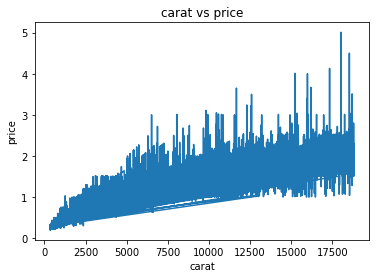

In [33]:
plt.plot(x,y)
plt.title('carat vs price')
plt.xlabel('carat')
plt.ylabel('price')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [36]:
x_train.shape

(43152, 1)

In [37]:
x_test.shape

(10788, 1)

In [38]:
y_train.shape

(43152, 1)

In [39]:
y_test.shape

(10788, 1)

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lm=LinearRegression()

In [42]:
lm.fit(x_train,y_train)

LinearRegression()

In [43]:
y_pred = lm.predict(x_test)

In [44]:
y_pred

array([[0.88577842],
       [1.07108791],
       [0.97092655],
       ...,
       [0.78868546],
       [1.26220545],
       [0.57718497]])

In [46]:
check= pd.DataFrame(x_test,columns=['diamonds'])

In [47]:
check['Actual tip'] = y_test

In [48]:
check['predicted tip']=y_pred

In [49]:
check

,diamonds,Actual tip,predicted tip
0,4733,1.10,0.885778
1,6424,1.29,1.071088
2,5510,1.20,0.970927
3,8770,1.50,1.328176
4,4493,0.90,0.859478
...,...,...,...
10783,1289,0.52,0.508365
10784,3435,0.91,0.743536
10785,3847,1.08,0.788685
10786,8168,1.02,1.262205


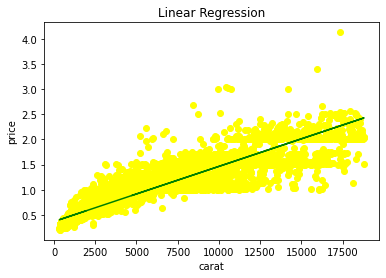

In [50]:
plt.scatter(x_test,y_test,color='yellow')
plt.plot(x_test,y_pred,color="green")
plt.title('Linear Regression')
plt.xlabel('carat')
plt.ylabel('price')
plt.show()

In [51]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [52]:
mean_squared_error(y_test,y_pred)

0.0329110096722418

In [53]:
mean_absolute_error(y_test,y_pred)

0.13359100700724869

In [54]:
r2_score(y_test,y_pred)

0.8516065939452342